In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math,scipy
import pickle
from scipy.stats import mannwhitneyu, ttest_ind
from sklearn.linear_model import PoissonRegressor
import statsmodels.api as sm
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,precision_score, recall_score
from sklearn.preprocessing import scale
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from itertools import cycle

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

%matplotlib inline  

In [14]:
df = pd.read_csv('../Data/_EBRData.csv')
df


,Number,PD,Age,Gender,EBRReading,EBRVideo,HY,GlassesReading,GlassesVideo,Years
0,1,1,58,0,2.0,6.0,5,1,1,1
1,2,1,69,0,0.7,18.0,3,1,1,1
2,3,1,77,1,3.0,2.0,2,1,1,20
3,4,1,82,0,1.3,4.0,3,1,1,2
4,5,1,86,0,1.0,1.0,5,1,1,11
...,...,...,...,...,...,...,...,...,...,...
56,57,0,71,0,4.7,19.3,0,1,1,0
57,58,0,83,0,11.7,7.0,0,0,0,0
58,59,0,70,1,7.7,10.0,0,0,0,0
59,60,0,62,1,15.7,26.7,0,0,0,0


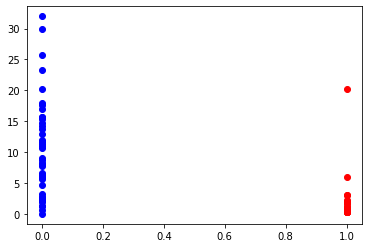

In [15]:
m = plt.subplot()
# m.plot(df['EBRReading'], df['Age'], 'o')

dfPD = [x for _, x in df.groupby(df['PD'] == 1)][0]
dfHC = [x for _, x in df.groupby(df['PD'] == 0)][0]

# dfPD = pd.DataFrame(dfPD) 

m.plot(dfPD['PD'], dfPD['EBRReading'], 'o', color='blue')
m.plot(dfHC['PD'], dfHC['EBRReading'], 'o', color='red')



In [17]:
data = df.drop(['HY', 'Years', 'Number'], axis=1)
data

,PD,Age,Gender,EBRReading,EBRVideo,GlassesReading,GlassesVideo
0,1,58,0,2.0,6.0,1,1
1,1,69,0,0.7,18.0,1,1
2,1,77,1,3.0,2.0,1,1
3,1,82,0,1.3,4.0,1,1
4,1,86,0,1.0,1.0,1,1
...,...,...,...,...,...,...,...
56,0,71,0,4.7,19.3,1,1
57,0,83,0,11.7,7.0,0,0
58,0,70,1,7.7,10.0,0,0
59,0,62,1,15.7,26.7,0,0


In [92]:
from webbrowser import Grail
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier, RidgeClassifier, RidgeClassifierCV, LassoCV
from sklearn import svm
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, NearestCentroid
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.feature_selection import SelectKBest, RFE, SequentialFeatureSelector
from sklearn import pipeline, metrics

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import BaggingClassifier
	

In [116]:

tData = data

drops = [0,0,0,0,0,0]
names = ['Age', 'Gender', 'EBRReading', 'EBRVideo', 'GlassesReading', 'GlassesVideo']

for i in range(1 << len(drops)):
	tData = data
	for j in range(len(drops)):
		if (i & (1 << j)) != 0:
			tData = tData.drop(names[j], axis=1)

		


	y = tData.iloc[:,0:1]
	y = np.array(y).ravel()
	X = tData.iloc[:,1:]

	print(tData.shape)

	model = LogisticRegression()



	n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1), n_jobs=-1, error_score='raise', verbose=0)

	print( str(i) + ': Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

(61, 7)
0: Accuracy: 0.847 (0.121)
(61, 6)


/Users/despicablemonkey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1: Accuracy: 0.836 (0.136)
(61, 6)
2: Accuracy: 0.830 (0.118)
(61, 5)
3: Accuracy: 0.848 (0.127)
(61, 6)
4: Accuracy: 0.728 (0.165)
(61, 5)
5: Accuracy: 0.756 (0.177)
(61, 5)
6: Accuracy: 0.715 (0.174)
(61, 4)
7: Accuracy: 0.727 (0.179)
(61, 6)
8: Accuracy: 0.819 (0.139)
(61, 5)
9: Accuracy: 0.825 (0.149)
(61, 5)
10: Accuracy: 0.825 (0.114)
(61, 4)
11: Accuracy: 0.831 (0.131)
(61, 5)
12: Accuracy: 0.671 (0.167)
(61, 4)
13: Accuracy: 0.655 (0.110)
(61, 4)
14: Accuracy: 0.628 (0.113)
(61, 3)
15: Accuracy: 0.655 (0.069)
(61, 6)
16: Accuracy: 0.771 (0.145)
(61, 5)
17: Accuracy: 0.799 (0.160)
(61, 5)
18: Accuracy: 0.782 (0.143)
(61, 4)
19: Accuracy: 0.771 (0.152)
(61, 5)
20: Accuracy: 0.696 (0.146)
(61, 4)
21: Accuracy: 0.696 (0.146)
(61, 4)
22: Accuracy: 0.669 (0.135)
(61, 3)
23: Accuracy: 0.701 (0.153)
(61, 5)
24: Accuracy: 0.783 (0.147)
(61, 4)
25: Accuracy: 0.799 (0.160)
(61, 4)
26: Accuracy: 0.787 (0.143)
(61, 3)
27: Accuracy: 0.781 (0.151)
(61, 4)
28: Accuracy: 0.639 (0.079)
(61, 3)
2

ValueError: at least one array or dtype is required